**Goals:** *Predict patient has kidney disease using clinical attributes*

# **1.0 Import Libraries**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"thilak1227","key":"f6b7f780db7c57a36691e4e97fd7e18a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **2.0 Load Dataset**

In [ ]:
!kaggle datasets download -d mansoordaku/ckdisease --force
!unzip -o ckdisease.zip


Dataset URL: https://www.kaggle.com/datasets/mansoordaku/ckdisease
License(s): unknown
  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 27.4MB/s]
Archive:  ckdisease.zip
  inflating: kidney_disease.csv      


# 2.1 Read CSV

In [ ]:
df = pd.read_csv("kidney_disease.csv")

# 2.2 View CSV

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# **3.0 Explore Dataset (EDA)**

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())   # Check missing values
print(df.duplicated().sum()) # Check duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# 3.1 Plot Target Distribution

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


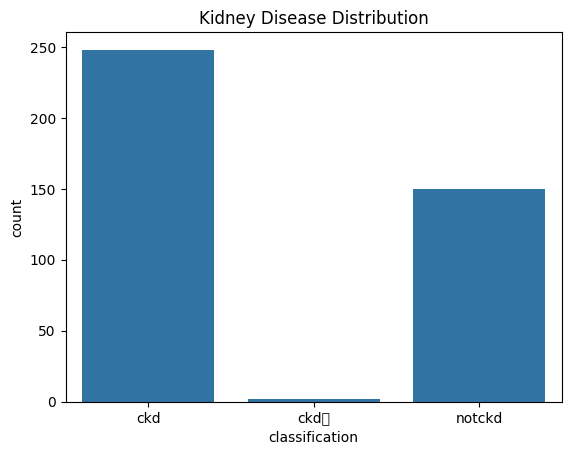

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='classification', data=df)
plt.title("Kidney Disease Distribution")
plt.show()

# **4.0 Preprocessing**

# 4.1 Drop Duplicates

In [ ]:
df = df.drop_duplicates()

# 4.2 Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].fillna('missing')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 4.3 Define Features & Condition

In [ ]:
# Convert 'pcv', 'wc', 'rc' to numeric, coercing errors to NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Impute missing numerical values with the median
# This includes NaNs created by 'coerce' above and other original NaNs
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']:
    if col in df.columns and df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Drop 'id' column as it is an identifier and not a feature
X = df.drop(['classification', 'id'], axis=1)
y = df['classification']

# 4.4 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4.5 Scale Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **5.0 Train Models**

# 5.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 5.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5.3 SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

# 5.4 XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:31:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# **6.0 Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

models = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm, 'XGBoost': xg}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=2))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression Results:
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC: 0.49133333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


🔹 Random Forest Results:
Accuracy: 0.9875
F1 Score: 0.9830508474576272
ROC-AUC: 0.31533333333333335
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           2       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80


🔹 SVM Results:
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC: 0.07066666666666667
              precision    recall  f1-score   support

           0       1.00     

# **7.0 Confusion Matrices**

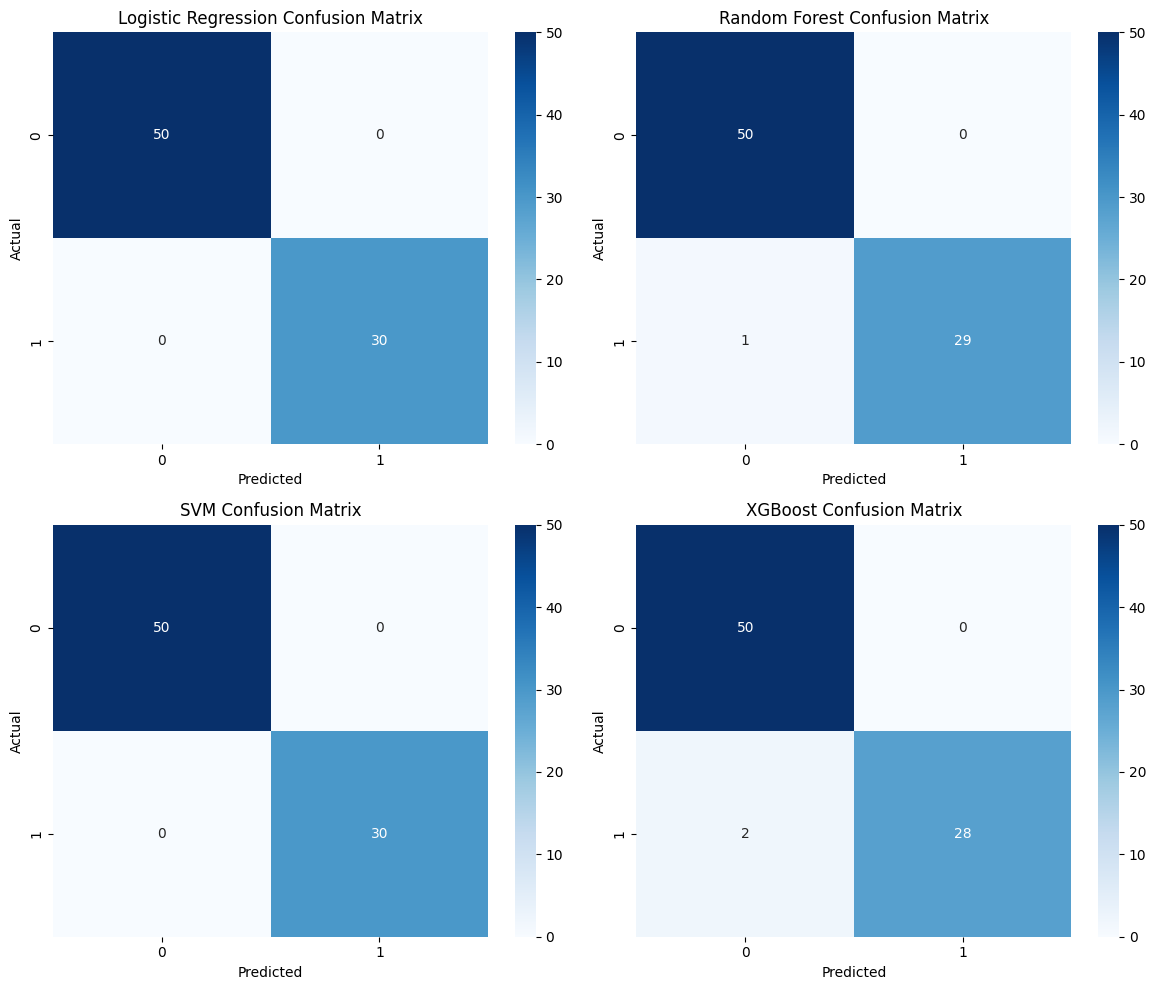

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# **8.0 ROC Curves**

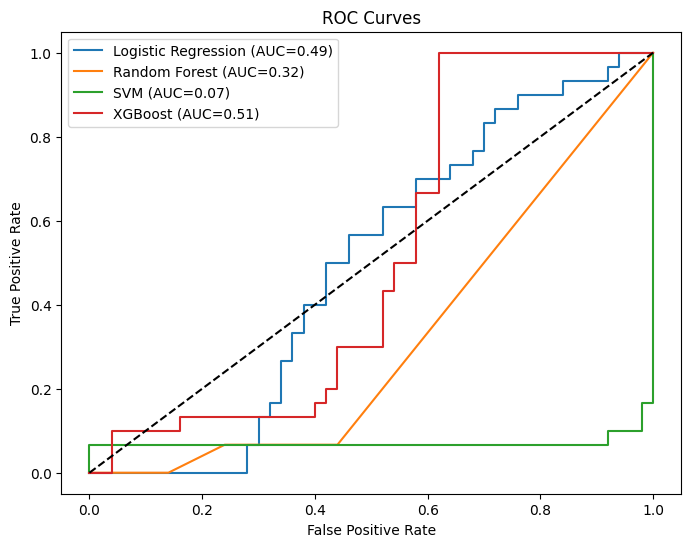

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    # Specify pos_label=2 for roc_curve as y_test contains labels 0 and 2
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)
    # Remove pos_label from roc_auc_score call within the label string
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# **9.0 Features Importance**

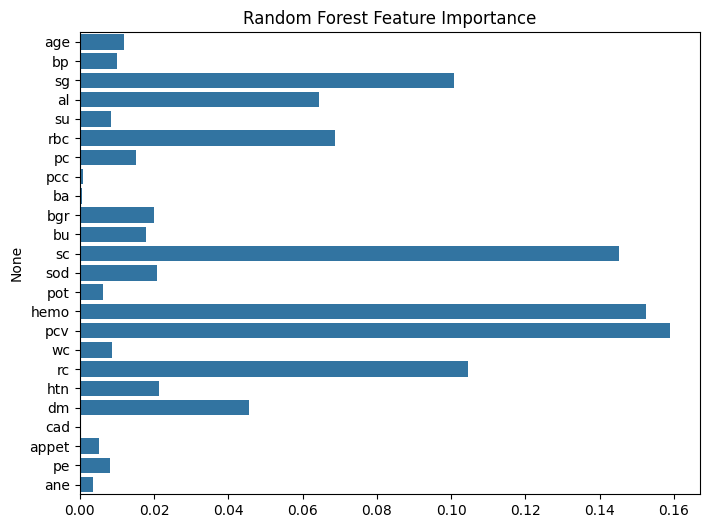

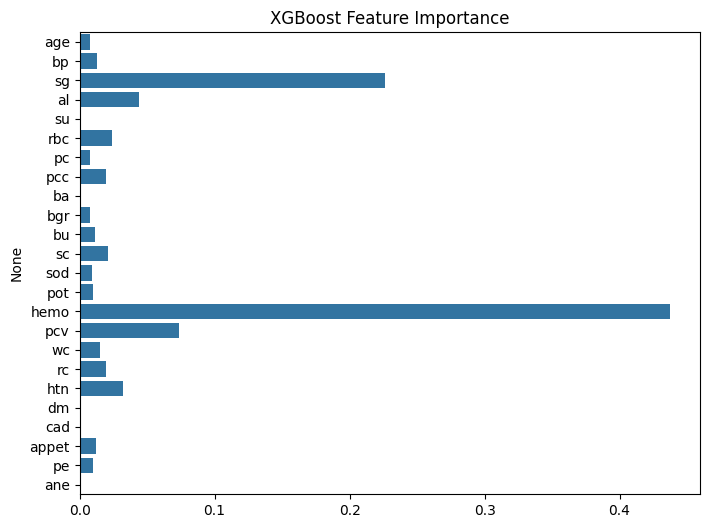

In [ ]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importance")
plt.show()

xg_importances = xg.feature_importances_

plt.figure(figsize=(8,6))
sns.barplot(x=xg_importances, y=features)
plt.title("XGBoost Feature Importance")
plt.show()

# **10.0 Hyper Tuning**

# 10.1 Decision Tree Hyper Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=dt_params,
                       cv=5,
                       scoring="accuracy")
dt_grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# 10.2 Random Forest Tuning

In [ ]:
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=rf_params,
                       cv=5,
                       scoring="accuracy",
                       n_jobs=-1)
rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

# **11.0 Tuned Model Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

tuned_models = {
    "Tuned Decision Tree": dt_grid.best_estimator_,
    "Tuned Random Forest": rf_grid.best_estimator_
}

results = {} # Initialize results dictionary

for name, model in tuned_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    results[name] = {
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "CV Mean Accuracy": round(np.mean(cv_scores), 4),
        "CV Std Dev": round(np.std(cv_scores), 4)
    }

    print(f"\n{name} - Best Params: {model.get_params()}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Tuned Decision Tree - Best Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Tuned Random Forest - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# **12.0 Comparison**

In [ ]:
print("\n=== Final Model Comparison ===")
comparison_df = pd.DataFrame(results).T
print(comparison_df)


=== Final Model Comparison ===
                     Train Accuracy  Test Accuracy  CV Mean Accuracy  \
Tuned Decision Tree          0.9875         0.9625            0.9625   
Tuned Random Forest          0.9906         0.9750            0.9906   

                     CV Std Dev  
Tuned Decision Tree      0.0337  
Tuned Random Forest      0.0125  
